# <center> Silicon Valley Diversity</center>

### Import Modules

In [3]:
# Importing Libraries
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
import seaborn as sns

from pylab import rcParams
from tqdm import tqdm

# Set plotting format
plt.rcParams['figure.figsize'] = (15,15)
%config InlineBackend.figure_format = 'retina'

# Disable notebook warnings
warnings.filterwarnings('ignore')


# Setting Dataframe format
pd.set_option('display.max_columns',1000)
pd.set_option('precision',2)


### Import Data

In [4]:
# import data from local data directory
data = pd.DataFrame(pd.read_csv('https://www.dropbox.com/s/9pzcz3srkg9bwsk/Reveal_EEO1_for_2016.csv?dl=1'))
dr = data
dr.head()

,company,year,race,gender,job_category,count
0,23andMe,2016,Latino,male,Executive/Senior officials & Mgrs,0
1,23andMe,2016,Latino,male,First/Mid officials & Mgrs,1
2,23andMe,2016,Latino,male,Professionals,7
3,23andMe,2016,Latino,male,Technicians,0
4,23andMe,2016,Latino,male,Sales workers,0



### Cleaning Data

In [5]:
# view data sctructure of the data
dr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 6 columns):
company         3960 non-null object
year            3960 non-null int64
race            3960 non-null object
gender          3696 non-null object
job_category    3960 non-null object
count           3960 non-null object
dtypes: int64(1), object(5)
memory usage: 185.7+ KB


In [6]:
# It appears that there is a "na" string value in the count column

# This forces pandas to read the column as an object
dr['count'].value_counts().head(10)

# replacing 'NA" string values to 0
dr['count'].replace(to_replace='na', value=0, inplace=True)

# changing count column to an int.dtype
dr['count'] = dr['count'].astype('int')

###### Dealing with Null Values

In [7]:
# quickly viewing if any other null value exist in the df
dr.isnull().sum()

company           0
year              0
race              0
gender          264
job_category      0
count             0
dtype: int64

In [8]:
# Viewing gender counts
dr['gender'].value_counts()

male      1848
female    1848
Name: gender, dtype: int64

In [9]:
# Viewing missing gender values
dr[dr['gender'].isnull()].sample(15)

,company,year,race,gender,job_category,count
1259,Facebook,2016,Overall_totals,NaN,Previous_totals,8446
717,Apple,2016,Overall_totals,NaN,Service workers,418
2509,Lyft,2016,Overall_totals,NaN,First/Mid officials & Mgrs,259
1076,eBay,2016,Overall_totals,NaN,laborers and helpers,0
2694,MobileIron,2016,Overall_totals,NaN,Craft workers,0
3416,Square,2016,Overall_totals,NaN,laborers and helpers,0
1248,Facebook,2016,Overall_totals,NaN,Executive/Senior officials & Mgrs,496
3413,Square,2016,Overall_totals,NaN,Administrative support,334
1970,Intel,2016,Overall_totals,NaN,Professionals,36160
2339,LinkedIn,2016,Overall_totals,NaN,Previous_totals,6279


Since the are multiple instances of null gender records corresponds to a summary row in the data (the race "Overall_totals"). We will be dropping any row that has a null value from the dataframe.

In [10]:
# Dropping row that contain null values for gender
dr.dropna(axis =0, how='any',inplace=True)

#Checking for null values again. 
dr.isnull().sum()

company         0
year            0
race            0
gender          0
job_category    0
count           0
dtype: int64

In [11]:
dr['job_category'].value_counts()

Professionals                        308
First/Mid officials & Mgrs           308
operatives                           308
Technicians                          308
Sales workers                        308
Craft workers                        308
laborers and helpers                 308
Totals                               308
Previous_totals                      308
Administrative support               308
Service workers                      308
Executive/Senior officials & Mgrs    308
Name: job_category, dtype: int64

Notice how Previous_totals and Totals are included in the 'job_category' feature. This is confusing, we will incorporate this data back in another notebook. For now, I will be removing it.

In [12]:
dr = dr[(dr['job_category'] != 'Previous_totals') 
  & (dr['job_category'] != 'Totals')]

In [13]:
dr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3080 entries, 0 to 3945
Data columns (total 6 columns):
company         3080 non-null object
year            3080 non-null int64
race            3080 non-null object
gender          3080 non-null object
job_category    3080 non-null object
count           3080 non-null int64
dtypes: int64(2), object(4)
memory usage: 168.4+ KB



## <center>Summary</center>


In [14]:
print('Start Year of  the Data:', dr['year'].max() )
print('End Year of  the Data:', dr['year'].min() )

Start Year of  the Data: 2016
End Year of  the Data: 2016


In [15]:
# The type of ethnic grouping in the data
pd.Series(dr['race'].unique())

0                                 Latino
1                                  White
2              Black_or_African_American
3    Native_Hawaiian_or_Pacific_Islander
4                                  Asian
5         American_Indian_Alaskan_Native
6                      Two_or_more_races
dtype: object

### Categorical Counts

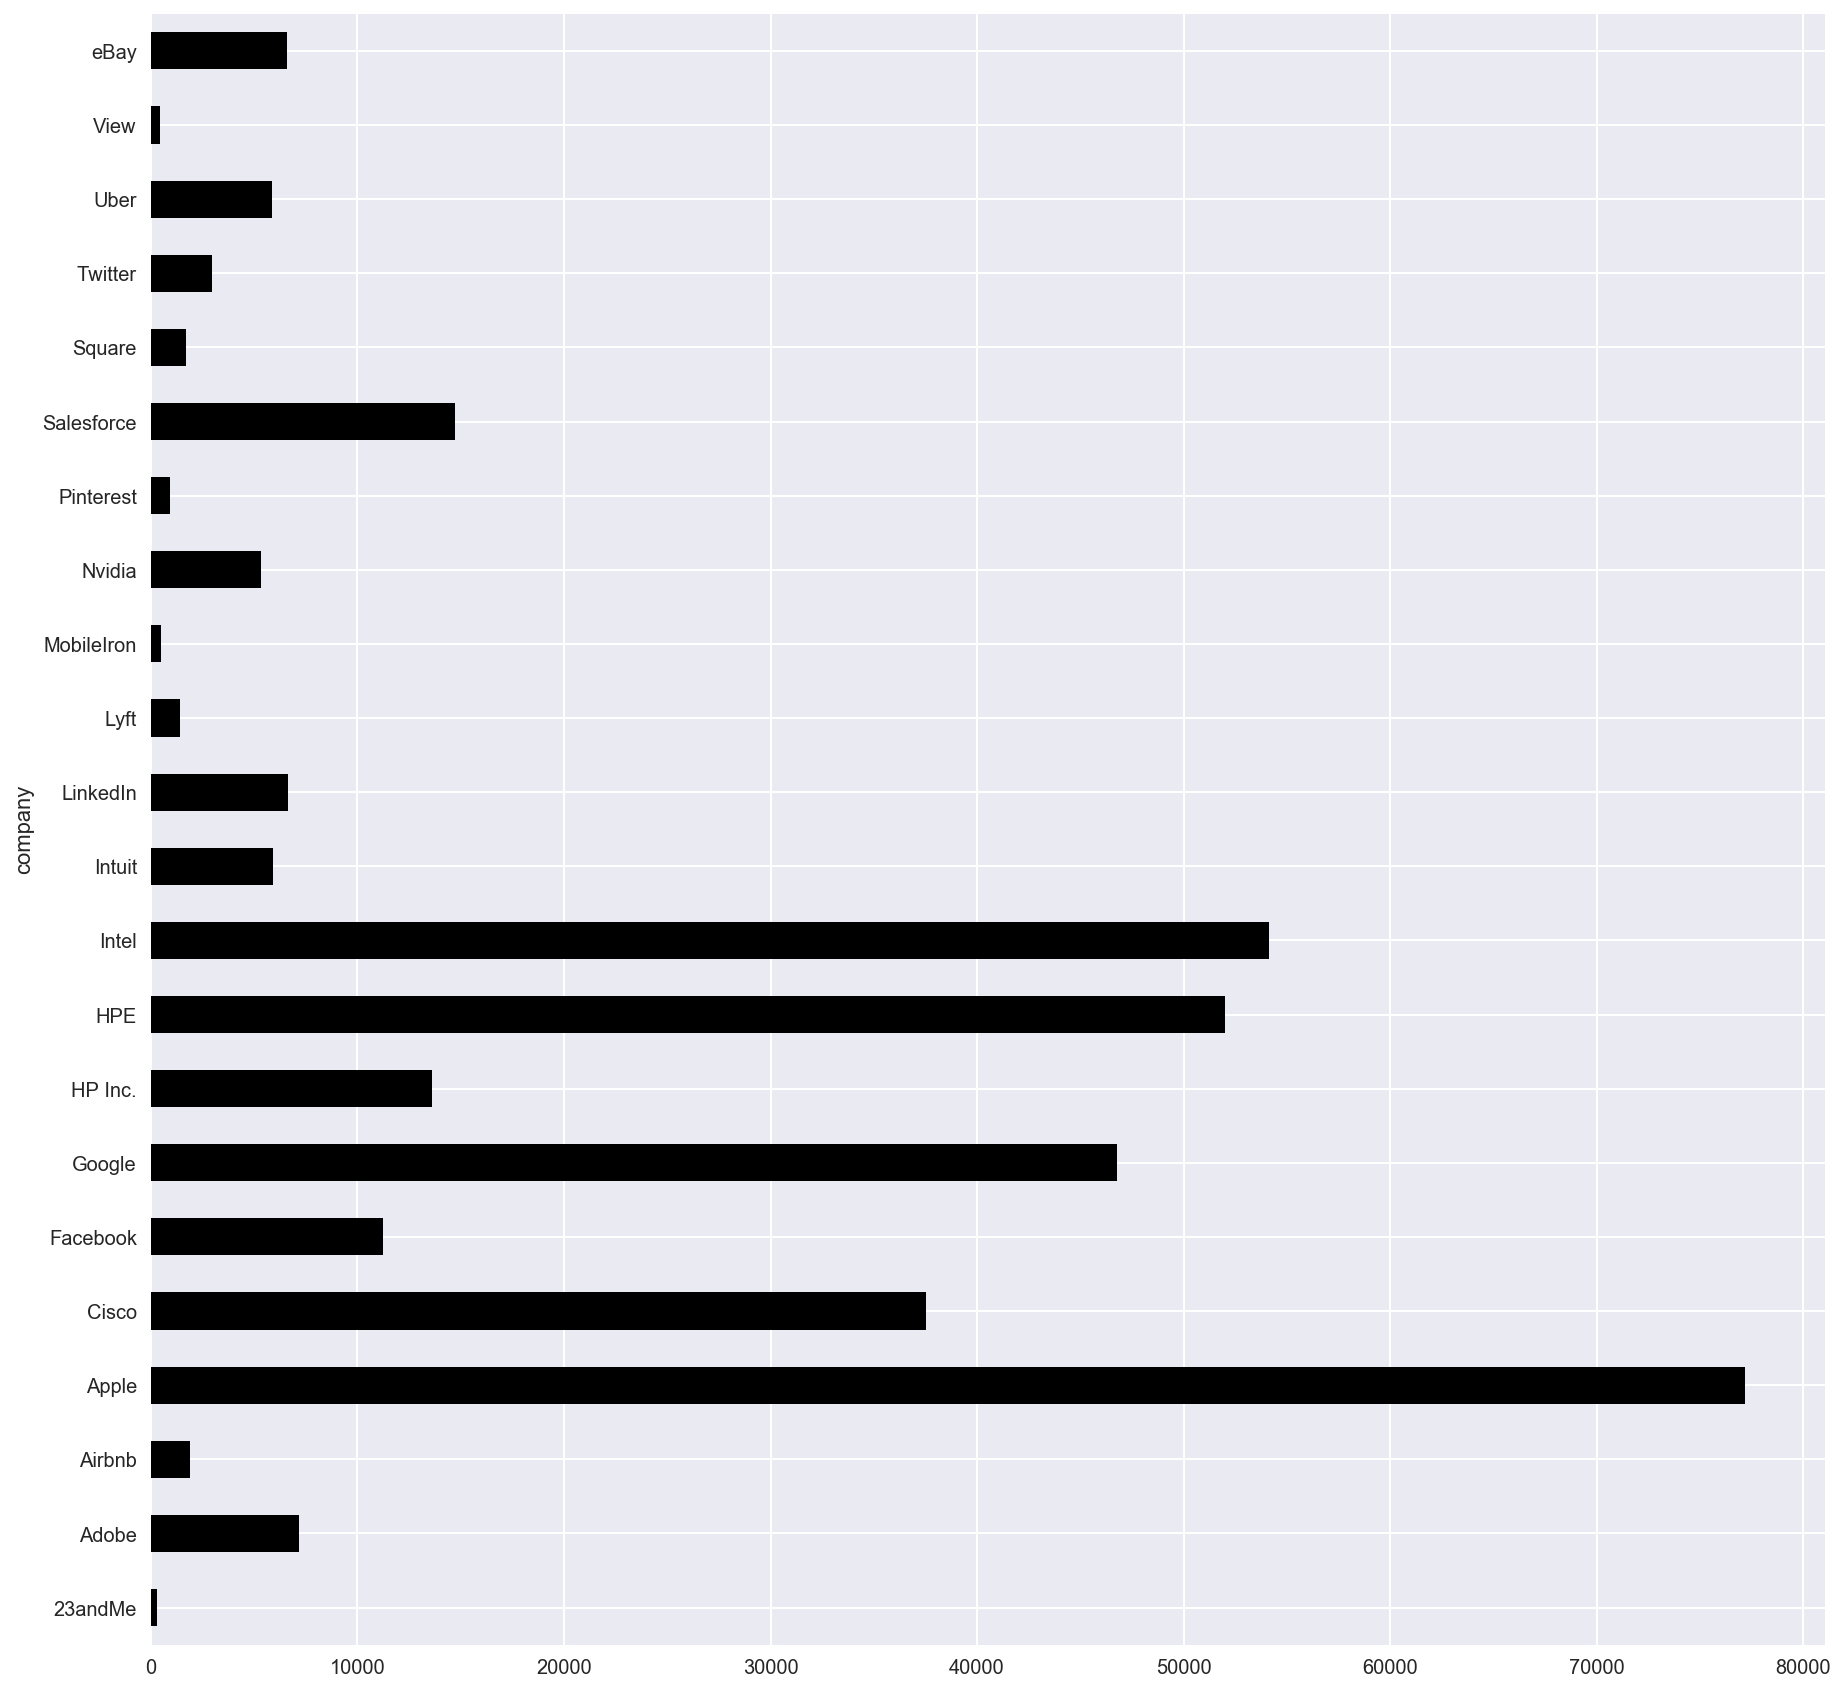

In [16]:
# Number of employees at each firm
dr.groupby('company')['count'].sum().plot.barh(color='black')

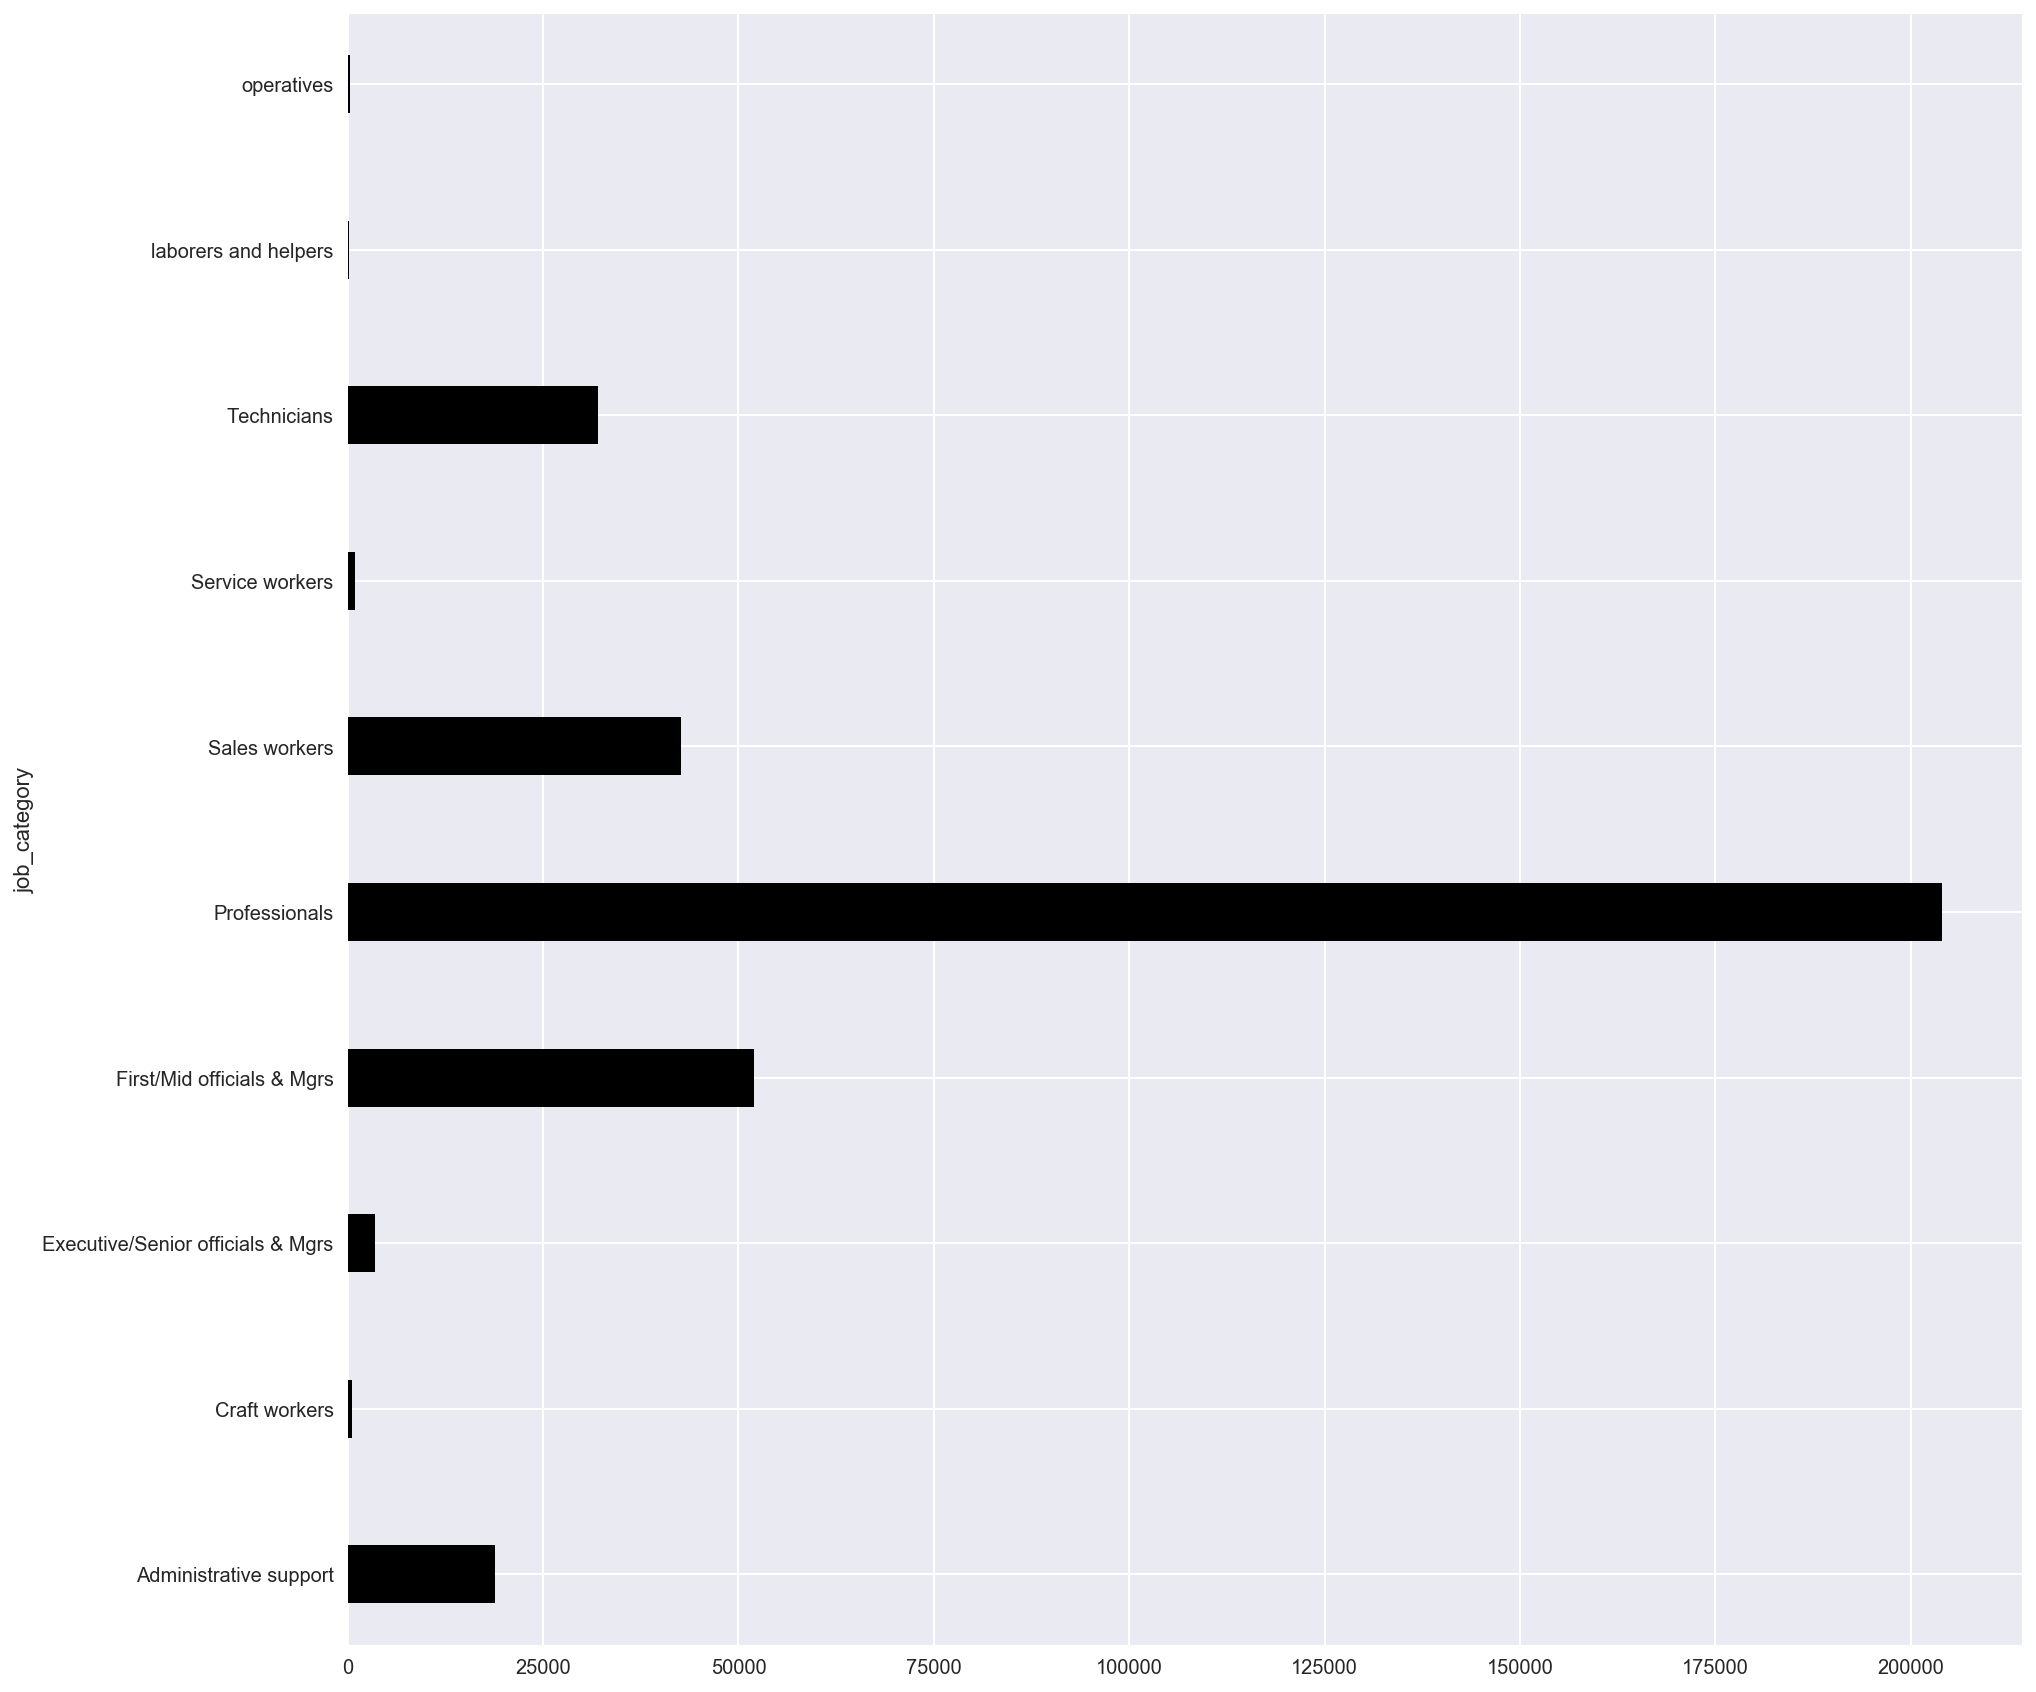

In [17]:
dr.groupby('job_category')['count'].sum().plot.barh(width=0.35, color='black')

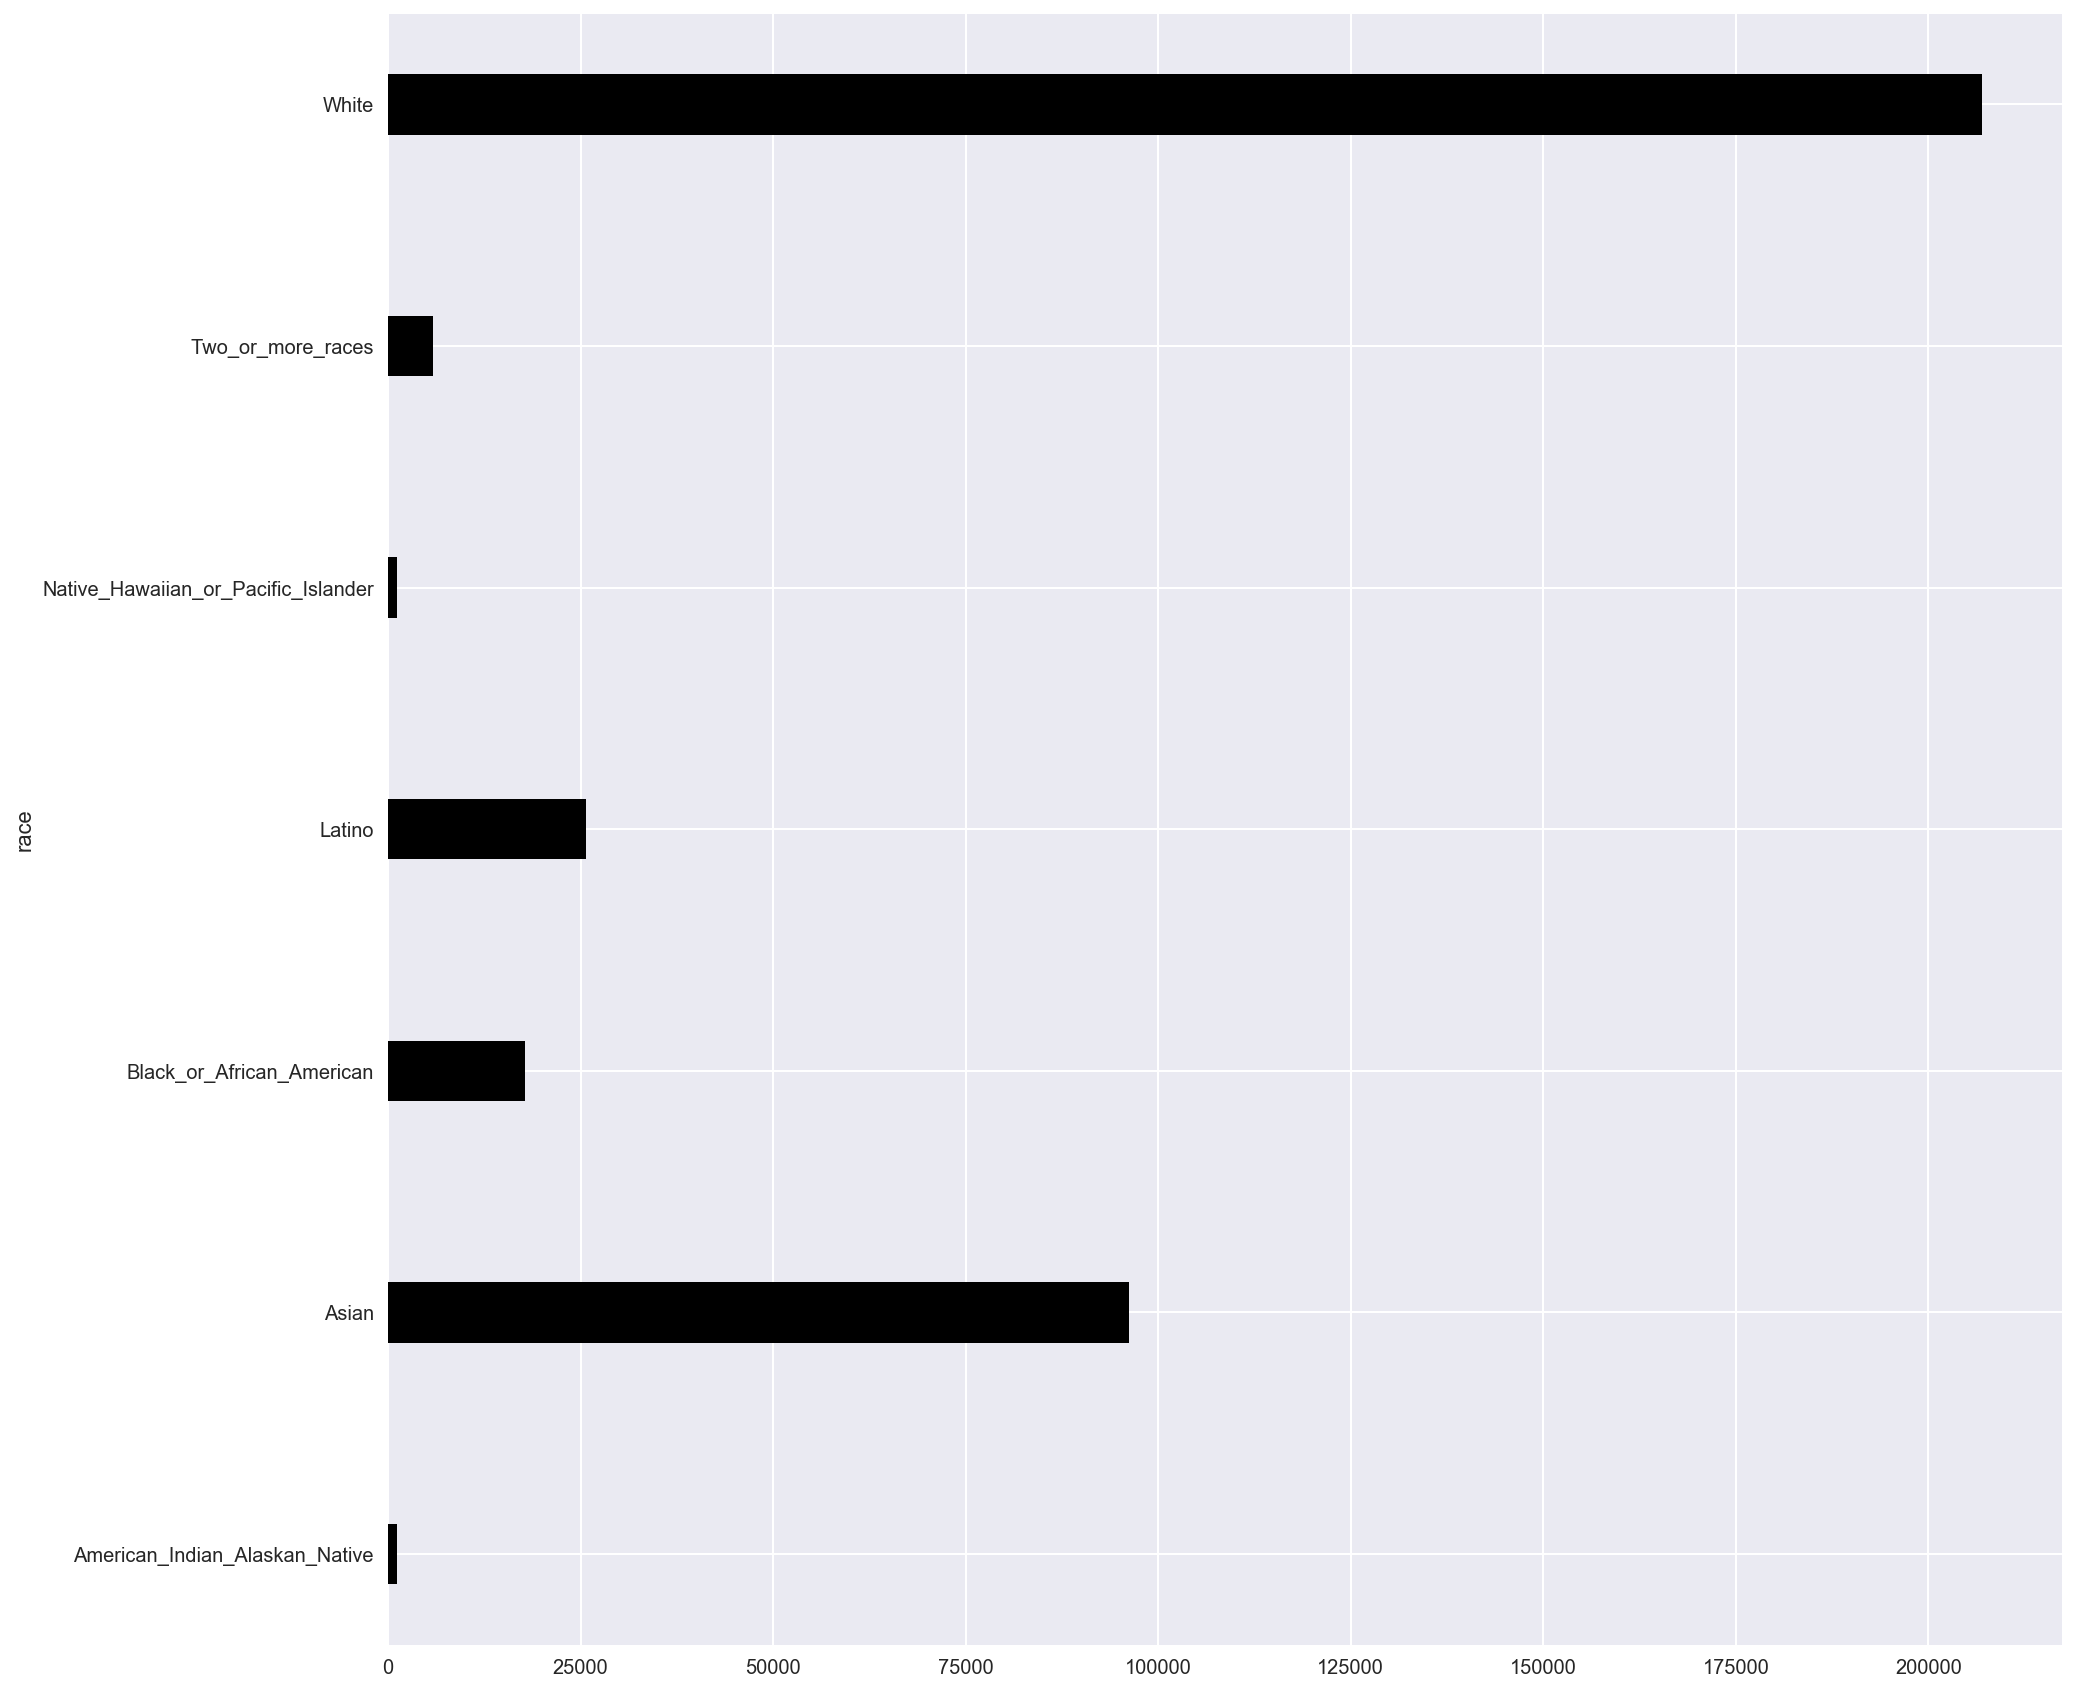

In [18]:
# The number of people hired in 2016 in each ethnic groups
dr.groupby('race')['count'].sum().plot.barh( width=0.25, color='black')

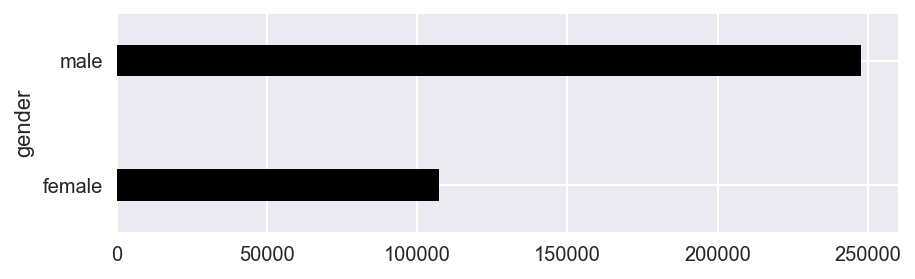

In [19]:
# The number of people hired in 2016 in each gender group
plt.figure(figsize=(7,2))
dr.groupby('gender')['count'].sum().plot.barh(width=0.25, color='black')

### Companies Leading in Gender Diversity

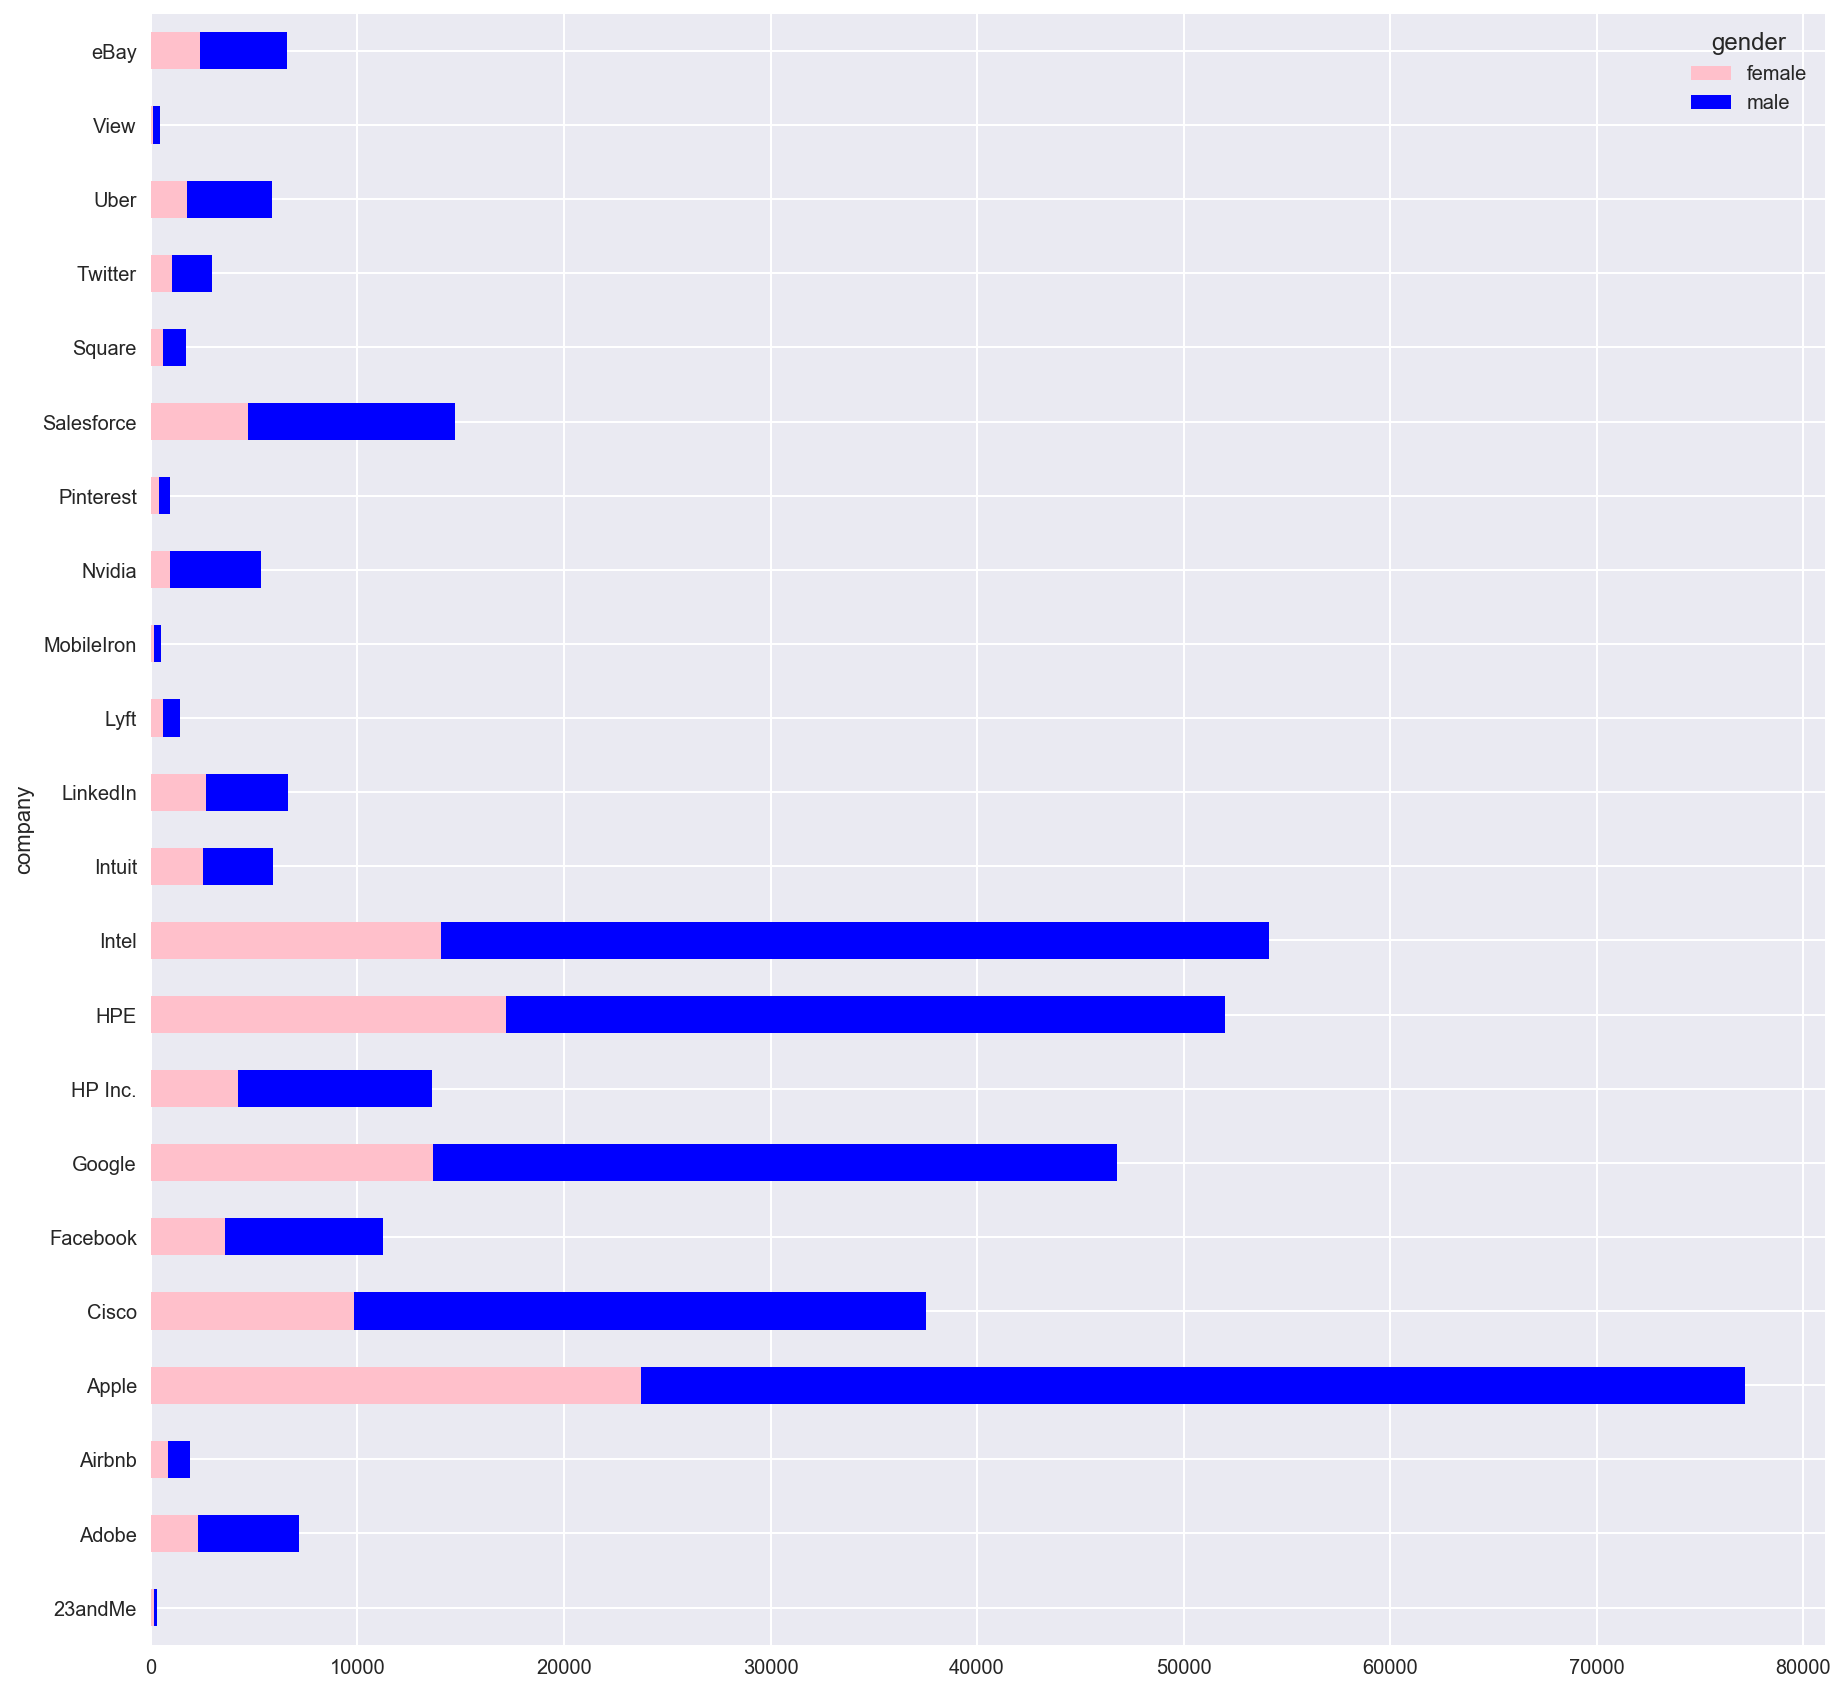

In [20]:
c_gen = dr.groupby(['company','gender'])['count'].sum().unstack()
gen = ['pink','blue']
c_gen.plot.barh(stacked=True, color=gen)

### Companies Leading in Ethnic Diversity 

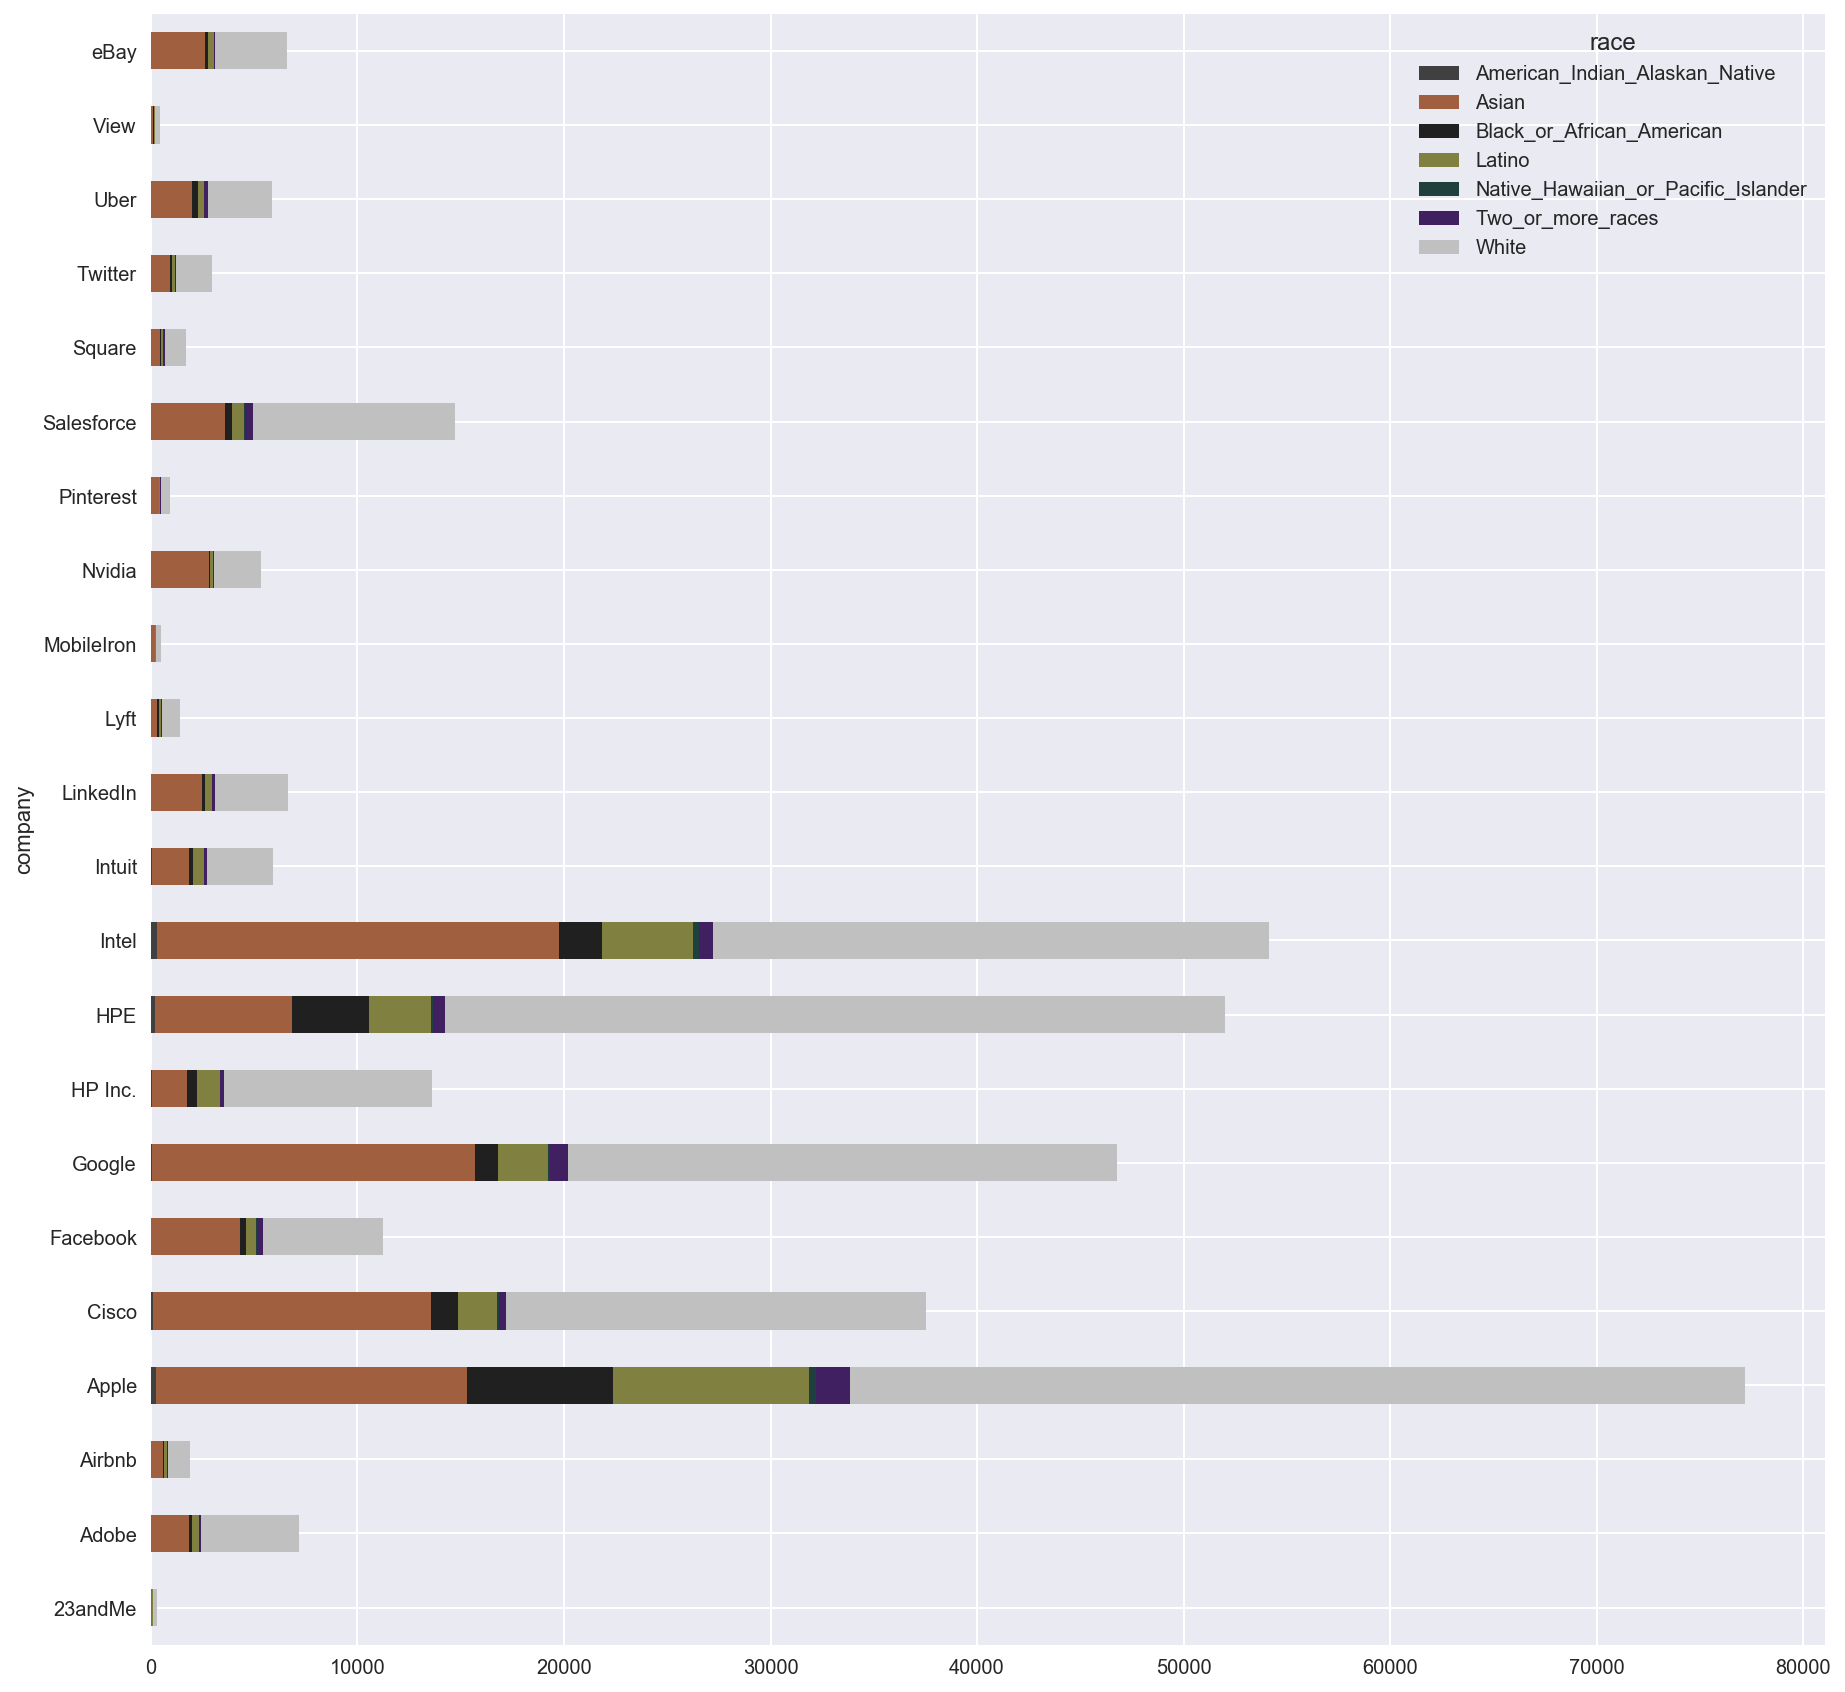

In [21]:
c_ethic = dr.groupby(['company','race'])['count'].sum().unstack()
ethnic = ['#404040','#a06040','#202020','#808040','#204040','#402060','#c0c0c0']

c_ethic.plot.barh(stacked=True, color=ethnic)

### Job Placement by Gender

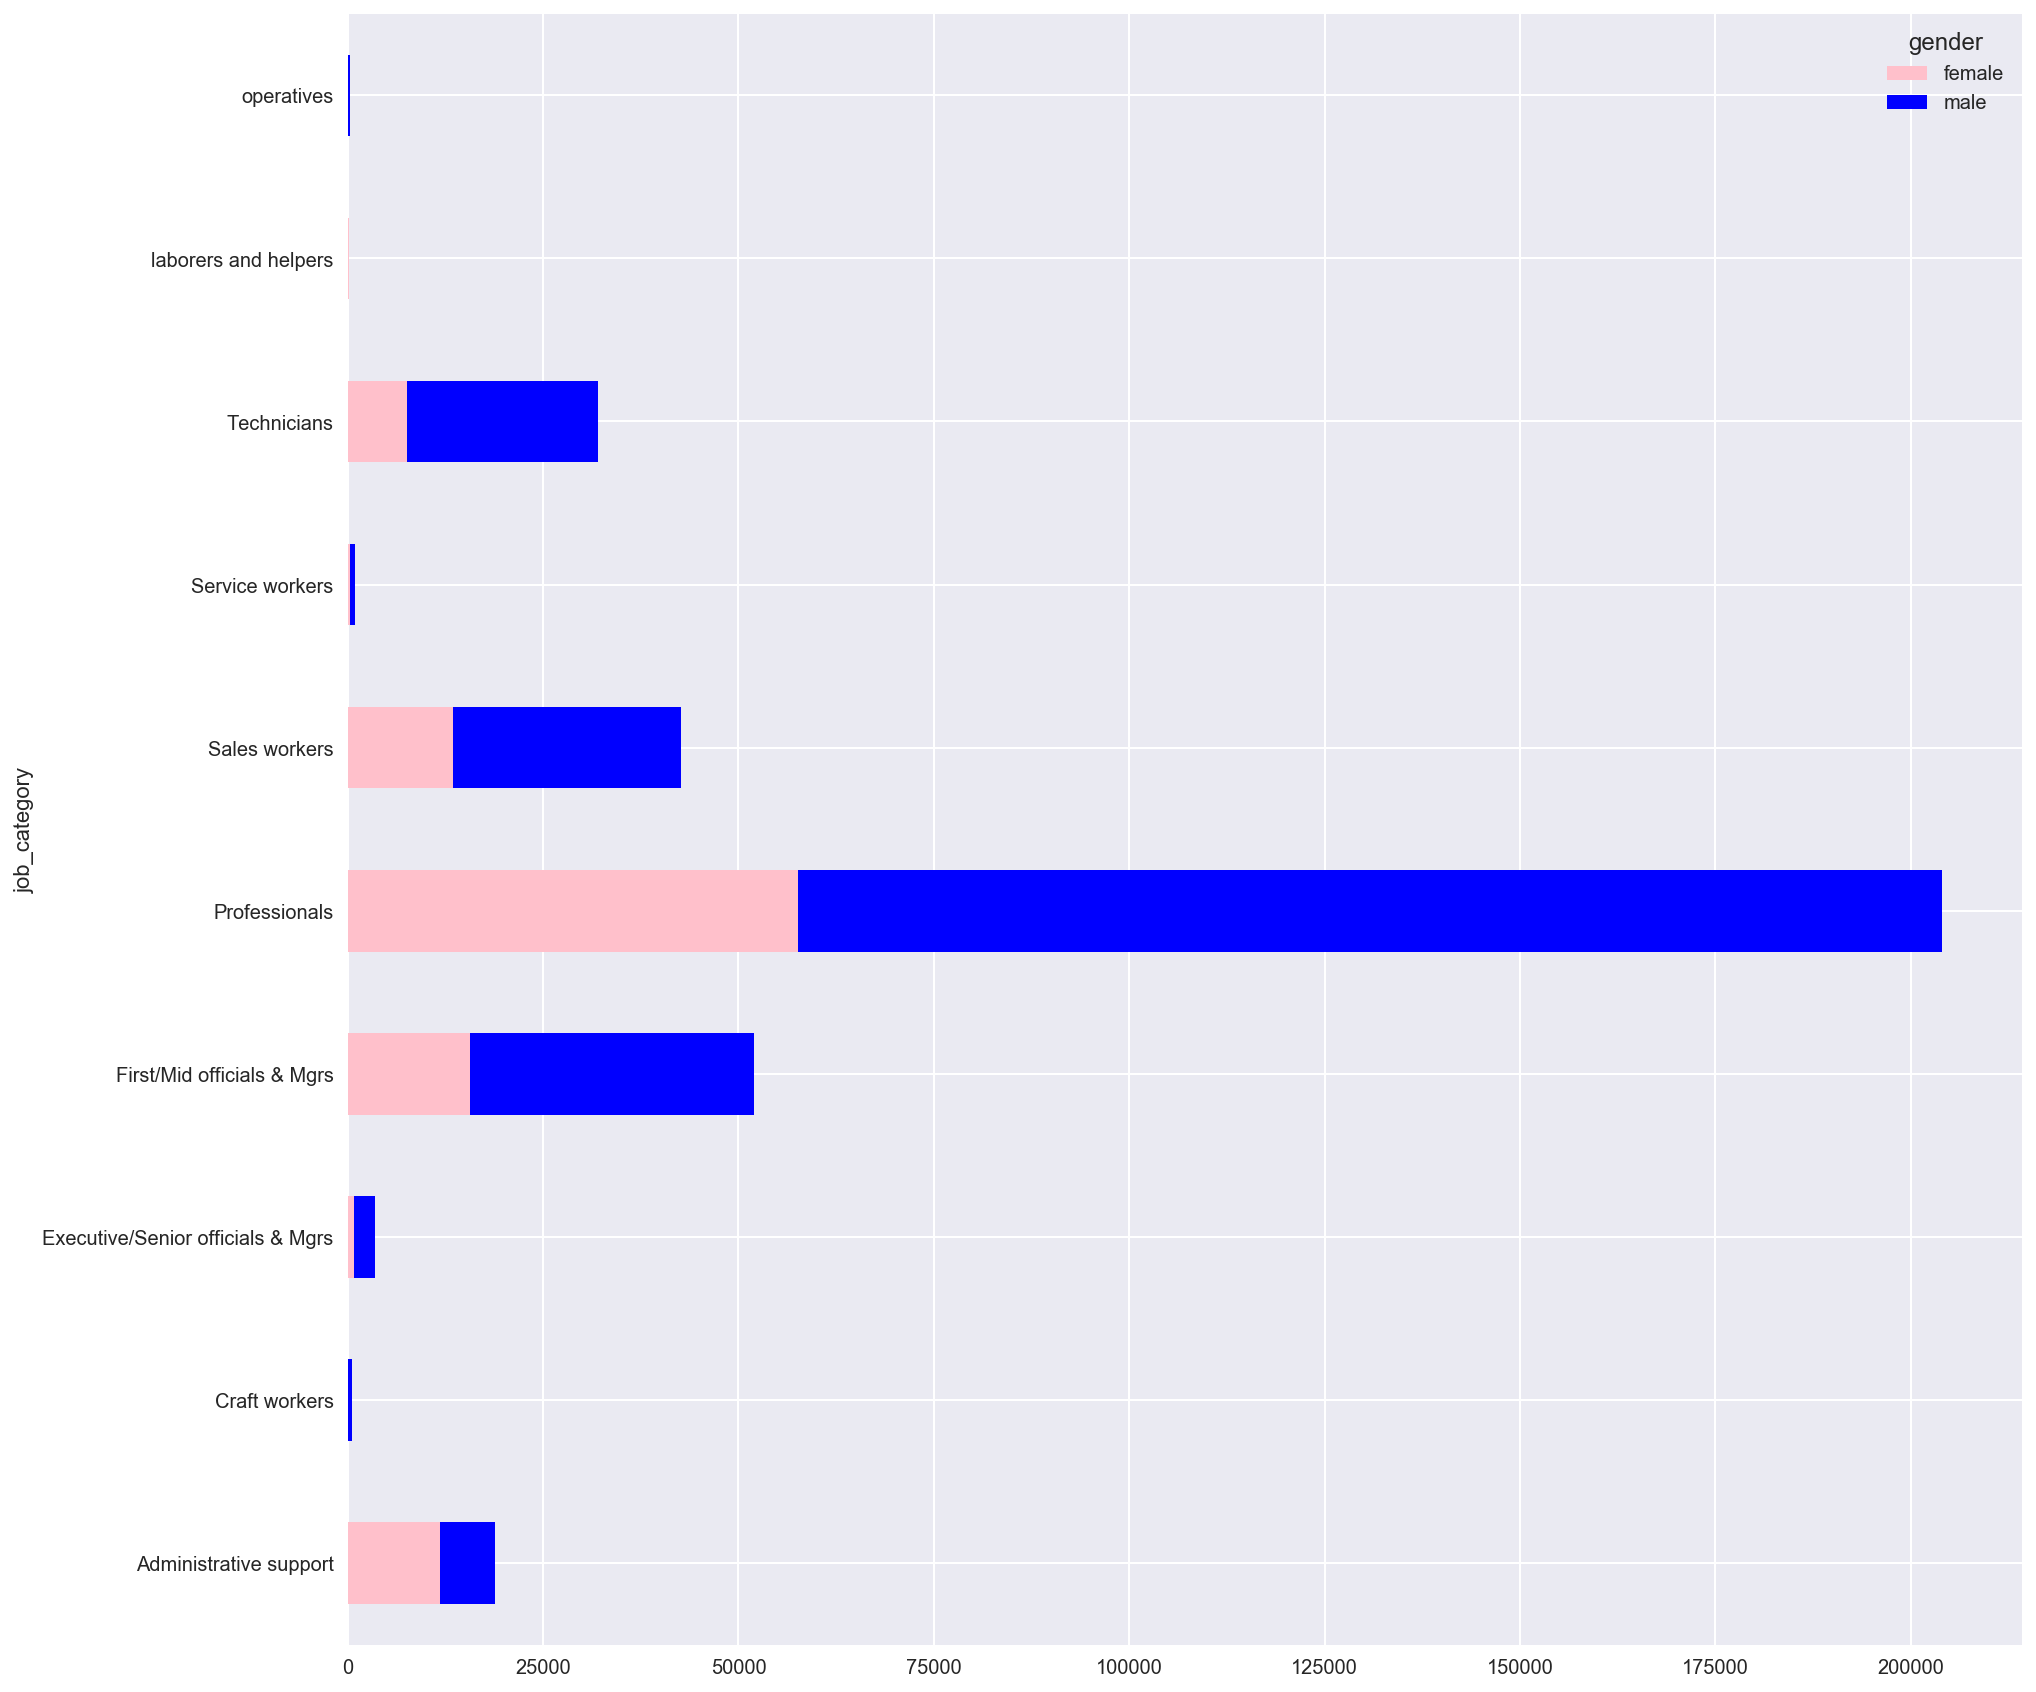

In [22]:
j_gen = dr.groupby(['job_category','gender'])['count'].sum().unstack()
j_gen.plot.barh(stacked=True, color=gen)

### Job Placement by Ethnic Group

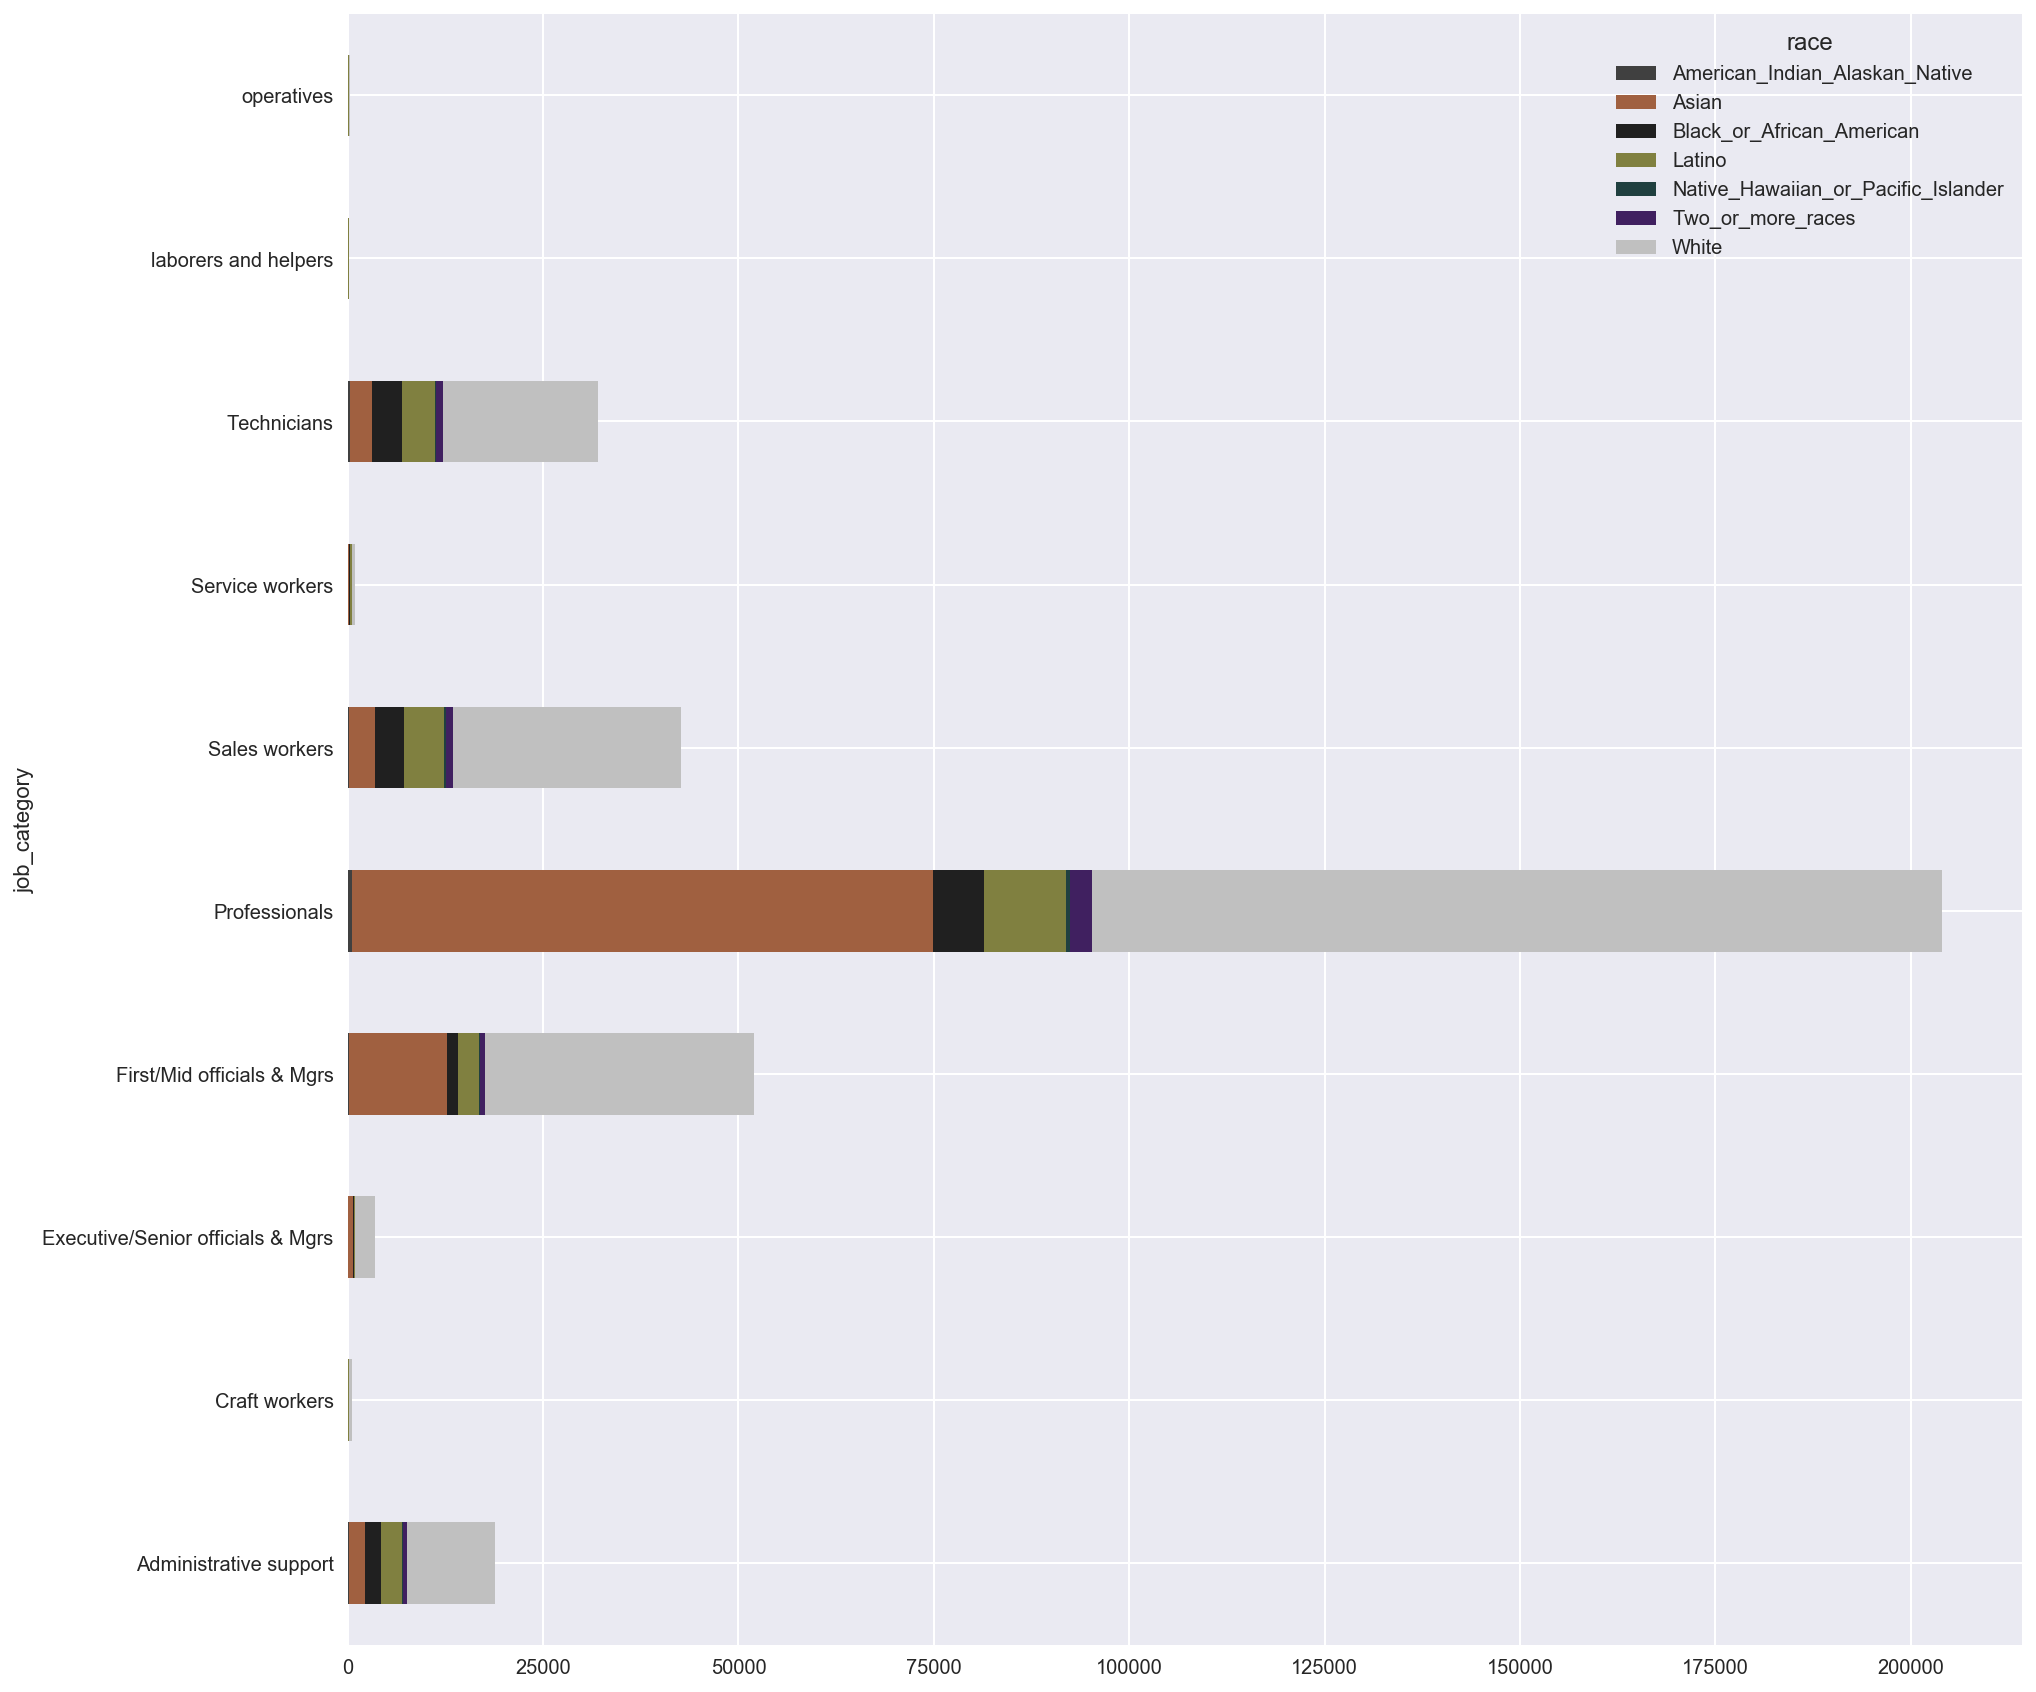

In [23]:
j_ethic = dr.groupby(['job_category','race'])['count'].sum().unstack()
j_ethic.plot.barh(stacked=True, color = ethnic)


### Comparing Ethnic Hires and Genders Hires

In [24]:
dr.groupby(['race','gender'])['count'].sum().unstack()

gender,female,male
race,,
American_Indian_Alaskan_Native,399,766
Asian,29837,66334
Black_or_African_American,7199,10633
Latino,8541,17226
Native_Hawaiian_or_Pacific_Islander,537,609
Two_or_more_races,2216,3655
White,58623,148389
